# Lead Scoring Case Study

The case study Steps followed in this Case Study:
    
    Step 1: Importing Data
    Step 2: Inspecting the Dataframe
    Step 3: Data Preparation - I
            - To do an initial data pre-processing - like handling missing values & inputing them, handling outliers
    Step 4: Data Visualization
            - To perform data visualizations for better understanding of the variables
    Step 5: Data Preparation - II
            - To perform further data prep - like converting binary variables (Yes/No) to 0/1, creating dummies etc
    Step 6: Test-Train Split
    Step 7: Feature Scaling
    Step 8: Looking at Correlations
    Step 9: Model Building
    Step 10: Feature Selection Using RFE
    Step 11: Plotting the ROC Curve
    Step 12: Finding Optimal Cutoff Point
    Step 13: Making predictions on the test set

### Step 1: Importing Data

In [3]:
#Suppress the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("Leads.csv")

In [6]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [7]:
df.shape

(9240, 37)

In [8]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 3: Data Preparation - I

In [10]:
# Common functions
def count_select_plus_null():
    # Total Select values plus null for the above fields to see decide next step on these
    print('Percentage of Null+Select values found in columns:')
    for i in df.columns:    
        select_df = round(df[df[i].isin(["Select"])][i].value_counts()*100/len(df),1)    
        if not select_df.empty:        
            print(f"{i} ---- {select_df[0]+round(df[i].isnull().sum() * 100 / len(df),1)}")
            
def count_only_select():
    print('Percentage of Select values found in columns:')
    for i in df.columns:    
        select_df = round(df[df[i].isin(["Select"])][i].value_counts()*100/len(df),1)
        if not select_df.empty:
            print(f"{i} ---- {select_df[0]}")
            
def count_only_null():
    print('Percentage of available null values in columns:')
    for i in df.columns:
        if round(df[i].isnull().sum() * 100 / len(df),1)>0:
            print(f"{i} ---- {round(df[i].isnull().sum() * 100 / len(df),1)}")

#### a) Checking for Missing Values and Inputing Them

In [11]:
#To display the pecentage of null values in each column
missing_values_percentage = round(df.isnull().sum() * 100 / len(df),1)
missing_values_percentage.sort_values(inplace=True, ascending = False)
missing_values_percentage

Lead Quality                                     51.6
Asymmetrique Activity Index                      45.6
Asymmetrique Profile Score                       45.6
Asymmetrique Activity Score                      45.6
Asymmetrique Profile Index                       45.6
Tags                                             36.3
Lead Profile                                     29.3
What matters most to you in choosing a course    29.3
What is your current occupation                  29.1
Country                                          26.6
How did you hear about X Education               23.9
Specialization                                   15.6
City                                             15.4
Page Views Per Visit                              1.5
TotalVisits                                       1.5
Last Activity                                     1.1
Lead Source                                       0.4
Receive More Updates About Our Courses            0.0
I agree to pay the amount th

In [12]:
#View and drop the columns with null values >= 40%
to_delete_columns=[]
for i in df.columns:
    if round(df[i].isnull().sum() * 100 / len(df),1)>=40:
        print(f"{i} ---- {round(df[i].isnull().sum() * 100 / len(df),1)}")
        to_delete_columns.append(i)
        df.drop(i,axis=1,inplace=True)

Lead Quality ---- 51.6
Asymmetrique Activity Index ---- 45.6
Asymmetrique Profile Index ---- 45.6
Asymmetrique Activity Score ---- 45.6
Asymmetrique Profile Score ---- 45.6


In [13]:
#View the columns with null values
count_only_null()

Percentage of available null values in columns:
Lead Source ---- 0.4
TotalVisits ---- 1.5
Page Views Per Visit ---- 1.5
Last Activity ---- 1.1
Country ---- 26.6
Specialization ---- 15.6
How did you hear about X Education ---- 23.9
What is your current occupation ---- 29.1
What matters most to you in choosing a course ---- 29.3
Tags ---- 36.3
Lead Profile ---- 29.3
City ---- 15.4


In [14]:
# We also need to have a look at the columns which have 'Select' and its percentage
count_only_select()

Percentage of Select values found in columns:
Specialization ---- 21.0
How did you hear about X Education ---- 54.6
Lead Profile ---- 44.9
City ---- 24.3


In [15]:
# Total null+Select values for the above fields to see decide next step on these
count_select_plus_null()

Percentage of Null+Select values found in columns:
Specialization ---- 36.6
How did you hear about X Education ---- 78.5
Lead Profile ---- 74.2
City ---- 39.7


In [16]:
# As per above, going for a random cutoff of 35% and to delete the columns with >35% null or Select values.
missing_columns_greater_than_35 = ['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City','Tags']
df.drop(missing_columns_greater_than_35,axis=1,inplace=True)

In [17]:
#View the columns with null values left
count_only_null()
# count_only_select()

Percentage of available null values in columns:
Lead Source ---- 0.4
TotalVisits ---- 1.5
Page Views Per Visit ---- 1.5
Last Activity ---- 1.1
Country ---- 26.6
What is your current occupation ---- 29.1
What matters most to you in choosing a course ---- 29.3


In [18]:
# Now, let's take a look at the feature 'What matters most to you in choosing a course'
df[['What matters most to you in choosing a course','Converted']].value_counts(sort=False, normalize=True)*100
# Majority of the people are interested in taking course for Better Career Prospects - this feature is not very intuitive.
# But for now, we will retain the feature and only remove the null values. 

What matters most to you in choosing a course  Converted
Better Career Prospects                        0            51.110090
                                               1            48.843975
Flexibility & Convenience                      0             0.015312
                                               1             0.015312
Other                                          0             0.015312
dtype: float64

In [19]:
# Removing the null values in 'What matters most to you in choosing a course'
df = df[~df['What matters most to you in choosing a course'].isnull()]

In [20]:
#View the columns with null values left
count_only_null()
# count_only_select()

Percentage of available null values in columns:
Lead Source ---- 0.6
TotalVisits ---- 2.0
Page Views Per Visit ---- 2.0
Last Activity ---- 1.6
Country ---- 24.6


In [21]:
# Replacing Lead source and Last activity with the mode
df['Lead Source'].fillna(df['Lead Source'].mode()[0], inplace=True)
df['Last Activity'].fillna(df['Last Activity'].mode()[0], inplace=True)

In [22]:
# Reviewing TotalVisits and Page Views Per Visit for handling missing values
df[['TotalVisits','Page Views Per Visit']].describe()

,TotalVisits,Page Views Per Visit
count,6401.000000,6401.000000
mean,3.590689,2.468644
std,4.847158,2.167626
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.500000
max,251.000000,55.000000


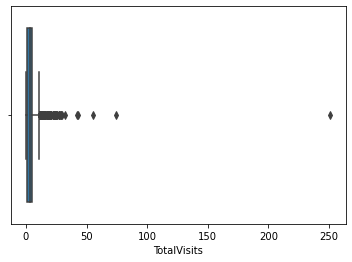

In [23]:
# Checking the box plots for TotalVisits and Page Views Per Visit.
sns.boxplot(df['TotalVisits'])
plt.show()

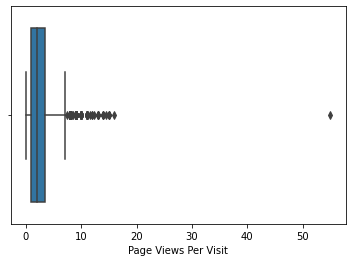

In [24]:
sns.boxplot(df['Page Views Per Visit'])
plt.show()

In [25]:
# As per the box plots, there are outliers in TotalVisits and Page Views Per Visit. 
# Hence, considering median as the best option to fill the null values.
df['TotalVisits'].fillna(df['TotalVisits'].median(), inplace=True)
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(), inplace=True)

In [26]:
# At this point, to replace the null values with 'Missing' for Country null values.
# will take care of these if needed at a later point
df['Country'].fillna('Missing',inplace=True)

#### Handling binary columns with imbalanced data

In [27]:
# Let's review the binary variables - to see the Yes & No counts
# Percentage of Yes values in columns
print('Percentage of Yes values in columns:')
for i in df.columns:    
    select_df = round(df[df[i].isin(["Yes"])][i].value_counts()*100/len(df),1)    
    if not select_df.empty:        
        print(f"{i} ---- {select_df[0]+round(df[i].isnull().sum() * 100 / len(df),1)}")

Percentage of Yes values in columns:
Do Not Email ---- 6.9
Do Not Call ---- 0.0
Search ---- 0.2
Newspaper Article ---- 0.0
Newspaper ---- 0.0
Digital Advertisement ---- 0.0
Through Recommendations ---- 0.1
A free copy of Mastering The Interview ---- 33.2


In [28]:
# Percentage of No values in columns
print('Percentage of No values in columns:')
for i in df.columns:    
    select_df = round(df[df[i].isin(["No"])][i].value_counts()*100/len(df),1)
    if not select_df.empty:        
        print(f"{i} ---- {select_df[0]+round(df[i].isnull().sum() * 100 / len(df),1)}")

Percentage of No values in columns:
Do Not Email ---- 93.1
Do Not Call ---- 100.0
Search ---- 99.8
Magazine ---- 100.0
Newspaper Article ---- 100.0
X Education Forums ---- 100.0
Newspaper ---- 100.0
Digital Advertisement ---- 100.0
Through Recommendations ---- 99.9
Receive More Updates About Our Courses ---- 100.0
Update me on Supply Chain Content ---- 100.0
Get updates on DM Content ---- 100.0
I agree to pay the amount through cheque ---- 100.0
A free copy of Mastering The Interview ---- 66.8


Insight:-
    
    - The columns above have ~100% Yes or ~100% No values which is not very intuitive
    - These fields are imbalanced and is not going to help with further analysis.
    - Hence, removing these columns since it will not add any value to the analysis.

In [29]:
to_remove=['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'X Education Forums', 'Newspaper Article', 'Newspaper', 
'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
df.drop(to_remove,axis=1,inplace=True)

#### b) Handling outliers

In [30]:
# Reviewing the numerical variables for outliers - 'TotalVisits','Total Time Spent on Website','Page Views Per Visit'
df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6531.000000,6531.000000,6531.000000
mean,3.578931,540.897872,2.459316
std,4.799376,568.212123,2.146939
min,0.000000,0.000000,0.000000
25%,1.000000,35.000000,1.000000
50%,3.000000,293.000000,2.000000
75%,5.000000,1031.500000,3.500000
max,251.000000,2272.000000,55.000000


In [31]:
df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6531 entries, 0 to 9239
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TotalVisits                  6531 non-null   float64
 1   Total Time Spent on Website  6531 non-null   int64  
 2   Page Views Per Visit         6531 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 204.1 KB


In [32]:
# Removing values>10 considering these as outliers
df[(df['TotalVisits']>10)]['TotalVisits'].value_counts()

11.0     70
13.0     39
12.0     31
14.0     28
16.0     16
15.0     14
17.0     12
18.0     12
20.0     10
19.0      6
27.0      5
23.0      5
21.0      5
25.0      3
22.0      3
24.0      3
29.0      2
26.0      2
30.0      1
43.0      1
55.0      1
74.0      1
251.0     1
32.0      1
28.0      1
42.0      1
Name: TotalVisits, dtype: int64

In [33]:
df[(df['TotalVisits']>10)].shape

(274, 14)

In [34]:
df=df[~(df['TotalVisits']>10)]

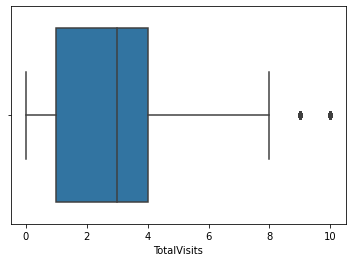

In [35]:
# The spread of data now looks much better after removing the above outliers for 'TotalVisits'
sns.boxplot(df['TotalVisits'])
plt.show()

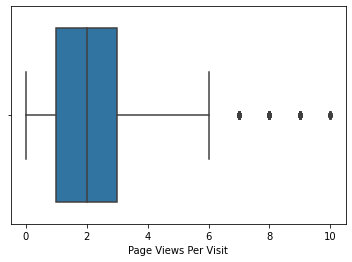

In [36]:
# The spread of data looks much better after removing the above outliers even for 'Page Views Per Visit'
sns.boxplot(df['Page Views Per Visit'])
plt.show()

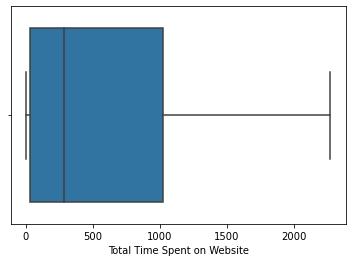

In [37]:
# The'Total Time Spent on Website' looks fine and does not have any outliers
sns.boxplot(df['Total Time Spent on Website'])
plt.show()

In [38]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,Better Career Prospects,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,Modified


### Step 4: Data Visualization

In [39]:
# Common functions
def eda_graph(column1):
    ax= sns.countplot(x=column1,hue='Converted',data=df,palette=["r","g"]) 
    plt.setp(ax.get_xticklabels(), rotation=90)
    ax.legend(loc=1)
    plt.show()
    
    bar1=(df[[column1,'Converted']].groupby(by=column1).mean().sort_values(by='Converted',ascending=False)*100).plot.bar()
    plt.xticks(rotation=90)  
    plt.ylabel('Percentage of Conversions')
    bar1.legend_.remove()
    plt.show()

In [40]:
df[['What is your current occupation','Converted']].value_counts(sort=False)

What is your current occupation  Converted
Businessman                      0               1
                                 1               4
Housewife                        1              10
Other                            0               6
                                 1               8
Student                          0             118
                                 1              75
Unemployed                       0            3037
                                 1            2325
Working Professional             0              55
                                 1             618
dtype: int64

In [41]:
df[['What is your current occupation','Converted']].value_counts(sort=False, normalize=True)*100

What is your current occupation  Converted
Businessman                      0             0.015982
                                 1             0.063928
Housewife                        1             0.159821
Other                            0             0.095893
                                 1             0.127857
Student                          0             1.885888
                                 1             1.198658
Unemployed                       0            48.537638
                                 1            37.158383
Working Professional             0             0.879016
                                 1             9.876938
dtype: float64

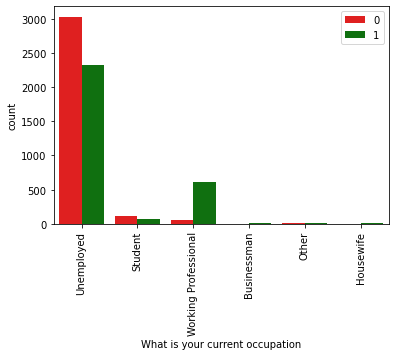

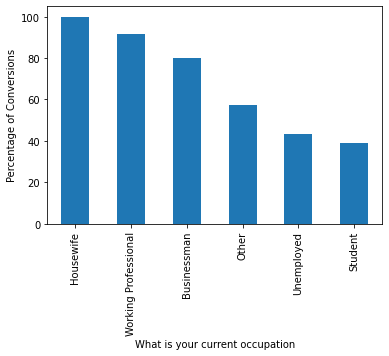

In [42]:
eda_graph('What is your current occupation')

Insight:-
    
    - Of the 10 Housewives identified as leads, all have been converted. So, there seems like a good potential and can be targeted.
    
    - There is good conversions seen among Working Professionals ~10% have converted. But, from the current numbers, we need to be targeting more Working Professionals.
    
    - Of the Unemployed Professionals, 37% have converted. There are large numbers of Unemployed Professionals - 48% who have not converted - so we need to dig in and look at the reasons for this.
    
    - There is also a small student population 1% who have converted from potential leads.    

In [43]:
df[['Lead Origin','Converted']].value_counts(sort=False)

Lead Origin              Converted
API                      0            1160
                         1             912
Landing Page Submission  0            1970
                         1            1454
Lead Add Form            0              54
                         1             660
Lead Import              0              33
                         1              13
Quick Add Form           1               1
dtype: int64

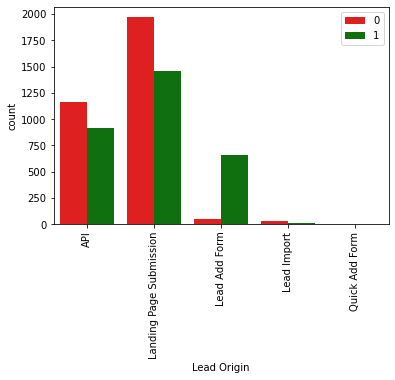

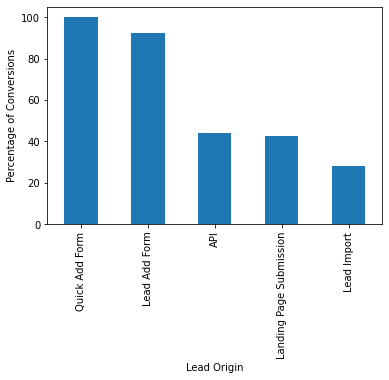

In [44]:
eda_graph('Lead Origin')

In [45]:
df[['Lead Source','Converted']].value_counts(sort=False)

Lead Source        Converted
Click2call         0               1
                   1               2
Direct Traffic     0            1121
                   1             670
Facebook           0              33
                   1              13
Google             0            1018
                   1             999
Live Chat          1               2
Olark Chat         0             509
                   1             375
Organic Search     0             443
                   1             325
Pay per Click Ads  0               1
Press_Release      0               1
Reference          0              44
                   1             488
Referral Sites     0              40
                   1              24
Social Media       0               1
                   1               1
WeLearn            1               1
Welingak Website   0               2
                   1             139
bing               0               2
                   1               1
testone  

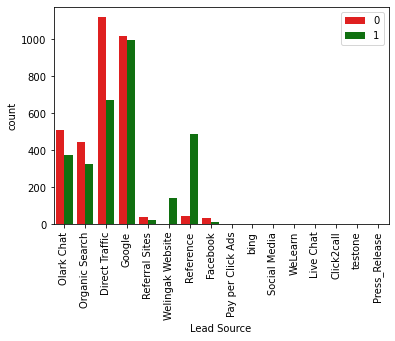

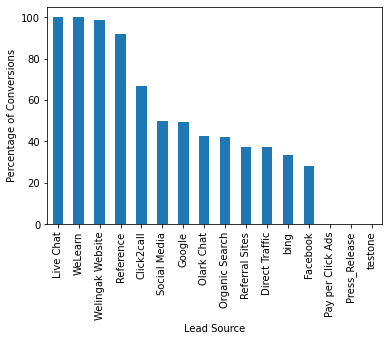

In [46]:
eda_graph('Lead Source')

Insight:-
    
    - Lead Origin - API, Landing Page Submission & Lead Add Form have good conversions
    
    - Lead Source - Reference have the best conversion rate followed by Direct Traffic, Google, Olark Chat & Organic Search

In [47]:
df[['What matters most to you in choosing a course','Converted']].value_counts(sort=False)

What matters most to you in choosing a course  Converted
Better Career Prospects                        0            3215
                                               1            3039
Flexibility & Convenience                      0               1
                                               1               1
Other                                          0               1
dtype: int64

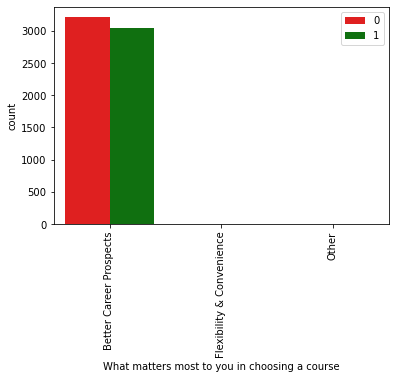

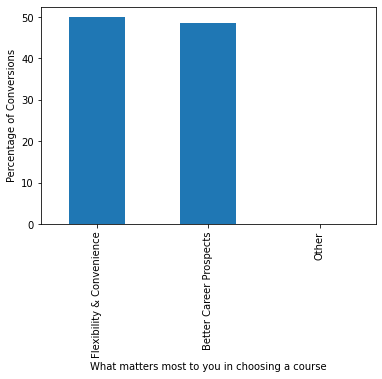

In [48]:
eda_graph('What matters most to you in choosing a course')

Insight:- 
    
    - Almost all values have "Better Career Prospects" for  'What matters most to you in choosing a course'.
    
    - This feature is not very intuitive and can be deleted.

In [49]:
df[['Last Activity','Converted']].value_counts(sort=False)

Last Activity                 Converted
Approached upfront            1               9
Converted to Lead             0             243
                              1              48
Email Bounced                 0             163
                              1              24
Email Link Clicked            0             105
                              1              67
Email Marked Spam             1               2
Email Opened                  0            1290
                              1            1173
Email Received                1               2
Form Submitted on Website     0              53
                              1              24
Had a Phone Conversation      0               6
                              1              18
Olark Chat Conversation       0             348
                              1              66
Page Visited on Website       0             245
                              1             111
SMS Sent                      0             689


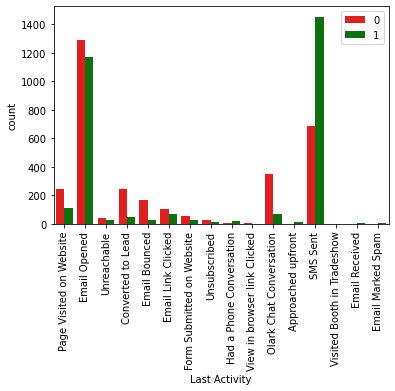

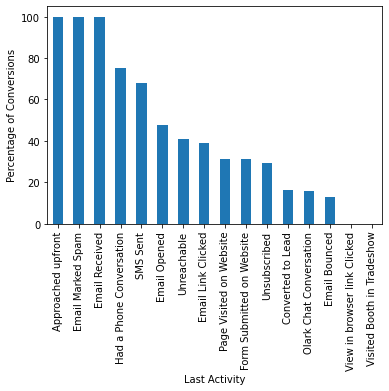

In [50]:
eda_graph('Last Activity')

In [51]:
df[['Country','Converted']].value_counts(sort=False)

Country               Converted
Australia             0               6
                      1               2
Bahrain               0               1
                      1               4
Bangladesh            1               1
Canada                0               2
China                 0               1
Denmark               1               1
France                0               1
                      1               3
Germany               0               1
                      1               1
Ghana                 0               1
Hong Kong             0               2
                      1               4
India                 0            2498
                      1            1965
Indonesia             0               1
Italy                 0               1
Kenya                 0               1
Kuwait                0               3
Malaysia              0               1
Missing               0             593
                      1            1007
Netherla

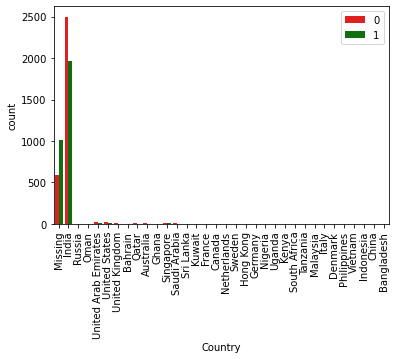

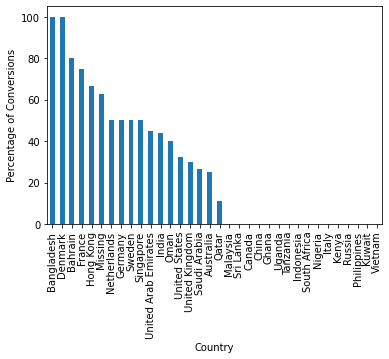

In [52]:
eda_graph('Country')

In [53]:
df[['A free copy of Mastering The Interview','Converted']].value_counts(sort=False)

A free copy of Mastering The Interview  Converted
No                                      0            2028
                                        1            2218
Yes                                     0            1189
                                        1             822
dtype: int64

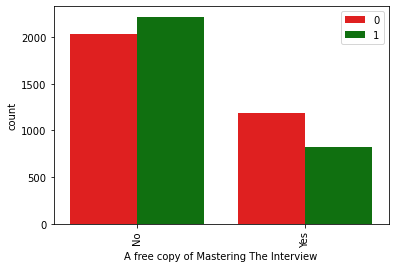

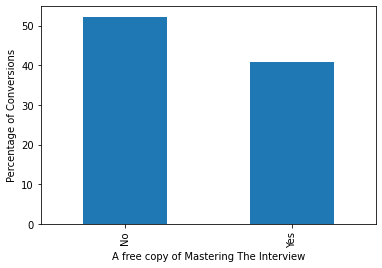

In [54]:
eda_graph('A free copy of Mastering The Interview')

In [55]:
df[['Last Notable Activity','Converted']].value_counts(sort=False)

Last Notable Activity         Converted
Approached upfront            1               1
Email Bounced                 0              39
                              1               9
Email Link Clicked            0              63
                              1              41
Email Marked Spam             1               2
Email Opened                  0            1038
                              1             916
Email Received                1               1
Had a Phone Conversation      1              10
Modified                      0            1359
                              1             664
Olark Chat Conversation       0              51
                              1              19
Page Visited on Website       0              96
                              1              64
SMS Sent                      0             546
                              1            1283
Unreachable                   0               2
                              1              20


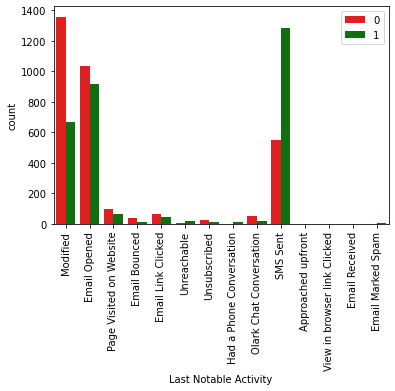

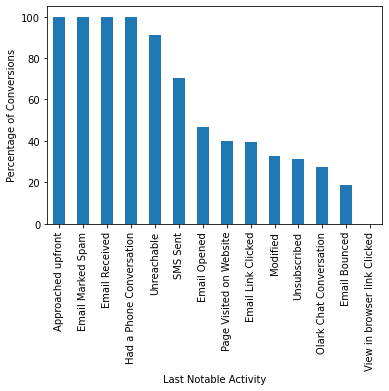

In [56]:
eda_graph('Last Notable Activity')

Insight:-
    
    - The customers who have Email Opened and SMS Sent as Last Activity/Last Notable Activity have good conversion rate. These 2 features are almost the same - so to remove one of them from the analysis.
    
    - Most of the customers are from India. Also, there are a lot of missing values in the Country field. So, this might not be very ideal for further analysis and will be removed.    
    
    - There is good conversion rate among people who have said no for freebies like 'A free copy of Mastering The Interview'.

In [57]:
df.drop(['Country','What matters most to you in choosing a course', 'Last Notable Activity'],axis=1,inplace=True)

In [58]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,No


### Step 5: Data Preparation - II

#### Converting some binary variables (Yes/No) to 0/1

In [59]:
# Now, there is only 1 binary (Yes/No) column left - A free copy of Mastering The Interview

In [60]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the dataframe
df[varlist] = df[varlist].apply(binary_map)

In [61]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0


#### For categorical variables with multiple levels - create dummy features

In [62]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead Origin','Lead Source', 'What is your current occupation', 'Last Activity']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [63]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,...,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,...,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,...,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_testone',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student

In [65]:
# We have created dummies for the below variables, so we can drop them
df = df.drop(['Lead Origin','Lead Source', 'What is your current occupation', 'Last Activity'], 1)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6257 entries, 0 to 9239
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           6257 non-null   object 
 1   Lead Number                                           6257 non-null   int64  
 2   Converted                                             6257 non-null   int64  
 3   TotalVisits                                           6257 non-null   float64
 4   Total Time Spent on Website                           6257 non-null   int64  
 5   Page Views Per Visit                                  6257 non-null   float64
 6   A free copy of Mastering The Interview                6257 non-null   int64  
 7   Lead Origin_Landing Page Submission                   6257 non-null   uint8  
 8   Lead Origin_Lead Add Form                             6257

The data looks good and we can proceed with the next steps.

### Step 6: Test-Train Split

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
# Putting feature variable to X
X = df.drop(['Prospect ID','Lead Number', 'Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# Putting response variable to y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [70]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 7: Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
# Perform feature scaling on 'TotalVisits','Total Time Spent on Website','Page Views Per Visit'
df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6257.000000,6257.000000,6257.000000
mean,3.020617,531.002237,2.345779
std,2.424972,565.723563,1.901692
min,0.000000,0.000000,0.000000
25%,1.000000,28.000000,1.000000
50%,3.000000,281.000000,2.000000
75%,4.000000,1020.000000,3.000000
max,10.000000,2272.000000,10.000000


In [73]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
6629,-1.239995,-0.937050,-1.228107,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
325,0.819452,-0.835331,1.407657,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3945,-1.239995,-0.937050,-1.228107,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5292,-1.239995,-0.937050,-1.228107,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8642,0.407563,-0.205724,0.880504,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [74]:
### Checking the Churn Rate
conversion = (sum(df['Converted'])/len(df['Converted'].index))*100
conversion

48.585584145756755

We have 49% of conversion rate

### Step 8: Looking at Correlations

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

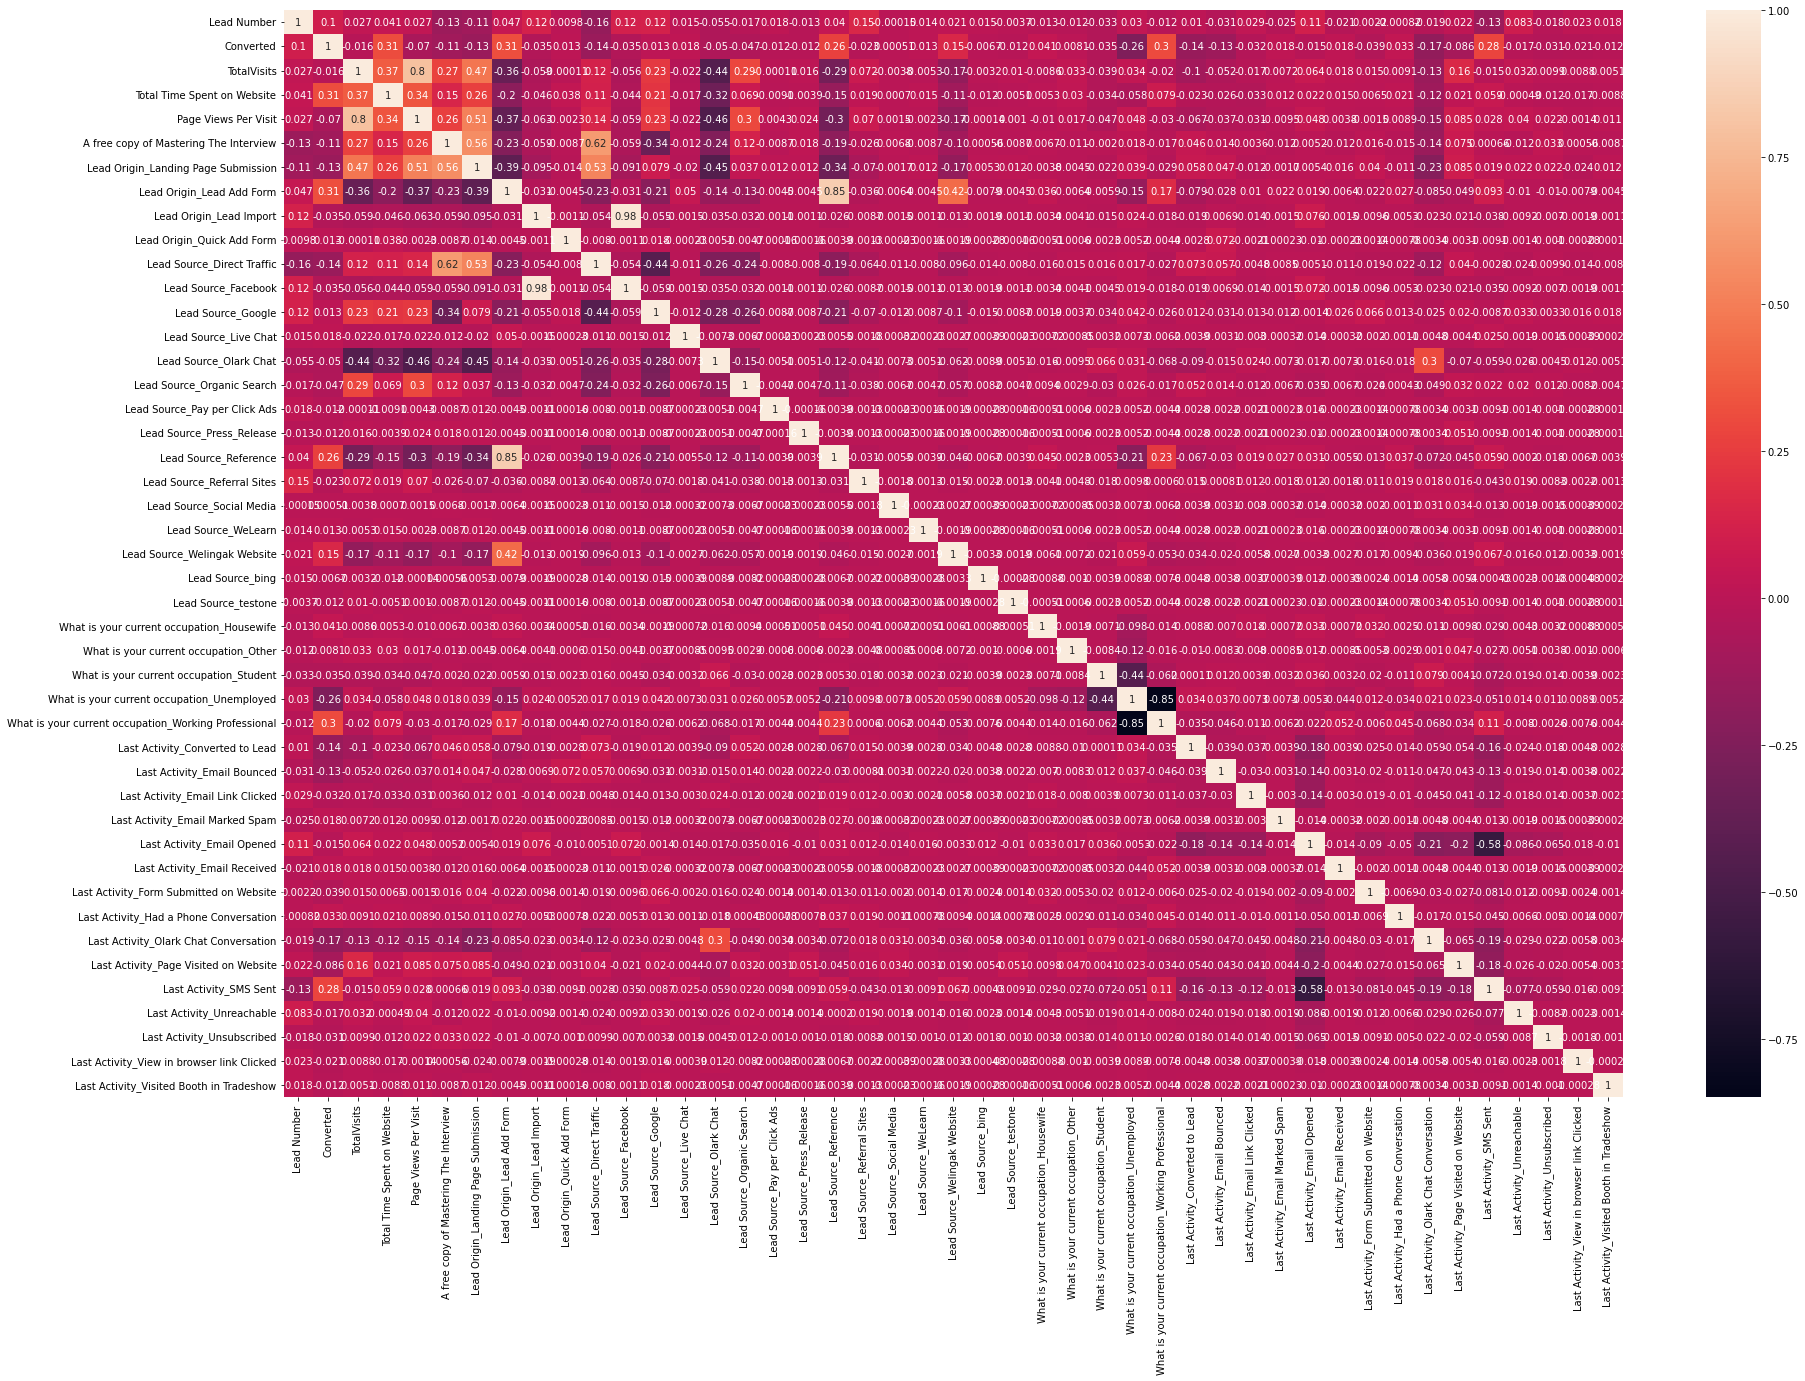

In [76]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [77]:
#Common function to find the relevant correlations - sourced from google
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(df, .7)

What is your current occupation_Unemployed  What is your current occupation_Working Professional   -0.849741
TotalVisits                                 Page Views Per Visit                                    0.795765
Lead Origin_Lead Add Form                   Lead Source_Reference                                   0.849359
Lead Origin_Lead Import                     Lead Source_Facebook                                    0.978100
Lead Number                                 Lead Number                                                  NaN
dtype: float64

Insight:-
    
    - There seems to be high correlation between the above features. However, at this point, not removing any columns.
    
    - Would prefer to see how the model behaves and then take appropriate action

### Step 9: Model Building

#### Model I

In [78]:
import statsmodels.api as sm

In [79]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4379
Model:                            GLM   Df Residuals:                     4339
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1995.7
Date:                Sat, 17 Jun 2023   Deviance:                       3991.4
Time:                        22:26:21   Pearson chi2:                 5.38e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3778
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   22.7806   2.72e+04      0.001      0.999   -5.33e+04    5.33e+04
TotalVisits                                              0.3444      0.068      5.081      0.000       0.212       0.477
Total Time Spent on Website                              1.0660      0.047     22.492      0.000       0.973       1.159
Page Views Per Visit                                    -0.2780      0.068     -4.084      0.000      -0.411      -0.145
A free copy of Mastering The Interview                  -0.0852      0.122     -0.698      0.485      -0.324       0.154
Lead Origin_Landing Page Submission                     -0.0513      0.125     -0.410      0.682      -0.297       0.194
Lead Origin_Lead Add Form                                2.7823      0.585      4.756      0.000       1.636       3.929
Lead Origin_Lead Import                                  1.0219      1.552      0.658      0.510      -2.020       4.064
Lead Origin_Quick Add Form                              23.0649   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                               1.2876      1.595      0.807      0.420      -1.839       4.414
Lead Source_Facebook                                     0.8306      2.219      0.374      0.708      -3.518       5.179
Lead Source_Google                                       1.5707      1.589      0.988      0.323      -1.544       4.686
Lead Source_Live Chat                                   23.2288   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                   2.9491      1.599      1.844      0.065      -0.185       6.083
Lead Source_Organic Search                               1.3632      1.596      0.854      0.393      -1.765       4.491
Lead Source_Pay per Click Ads                          -20.3451   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                              -20.1696   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                    2.0427      1.495      1.366      0.172      -0.888       4.974
Lead Source_Referral Sites                               1.5094      1.639      0.921      0.357      -1.704       4.723
Lead Source_Social Media                               -19.8211   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_WeLearn                                  -1.231e-10   1.05e-06     -0.000      1.000   -2.07e-06    2.07e-06
Lead Source_Welingak Website                             4.0224      1.649      2.439      0.015       0.790       7.255
Lead Source_bing                                         2

### Step 10: Feature Selection Using RFE

In [80]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [81]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)

In [82]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('A free copy of Mastering The Interview', False, 17),
 ('Lead Origin_Landing Page Submission', False, 19),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Origin_Quick Add Form', False, 5),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 13),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 7),
 ('Lead Source_Press_Release', False, 11),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Social Media', False, 15),
 ('Lead Source_WeLearn', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 12),
 ('Lead Source_testone', False, 21),
 ('What is your current occupation_Housewife', True, 1),
 ('Wh

In [83]:
col = X_train.columns[rfe.support_]

In [84]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Live Chat', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_testone', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Received',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow'],
      dtype='object')

#### Assessing the model with StatsModels

#### Model II

In [85]:
X_train_sm=sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4379
Model:                            GLM   Df Residuals:                     4358
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2016.4
Date:                Sat, 17 Jun 2023   Deviance:                       4032.9
Time:                        22:26:22   Pearson chi2:                 5.26e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3719
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9843      1.384      0.711      0.477      -1.727       3.696
Total Time Spent on Website                              1.0794      0.047     23.000      0.000       0.987       1.171
Lead Origin_Lead Add Form                                2.5800      0.516      5.004      0.000       1.569       3.591
Lead Source_Direct Traffic                              -0.4208      0.284     -1.482      0.138      -0.977       0.136
Lead Source_Google                                      -0.0520      0.282     -0.184      0.854      -0.604       0.500
Lead Source_Olark Chat                                   1.2914      0.292      4.425      0.000       0.719       1.863
Lead Source_Organic Search                              -0.2645      0.296     -0.895      0.371      -0.844       0.315
Lead Source_Reference                                    0.5831      0.600      0.973      0.331      -0.592       1.758
Lead Source_Welingak Website                             2.5439      0.917      2.774      0.006       0.746       4.341
What is your current occupation_Housewife               20.6835   1.45e+04      0.001      0.999   -2.83e+04    2.84e+04
What is your current occupation_Other                   -1.2665      1.498     -0.845      0.398      -4.203       1.670
What is your current occupation_Student                 -1.9011      1.365     -1.393      0.164      -4.576       0.774
What is your current occupation_Unemployed              -2.0445      1.350     -1.515      0.130      -4.690       0.601
What is your current occupation_Working Professional     0.5749      1.363      0.422      0.673      -2.096       3.246
Last Activity_Converted to Lead                         -0.7219      0.258     -2.799      0.005      -1.228      -0.216
Last Activity_Email Bounced                             -1.5459      0.363     -4.259      0.000      -2.257      -0.834
Last Activity_Email Opened                               0.3733      0.138      2.704      0.007       0.103       0.644
Last Activity_Form Submitted on Website                 -0.5343      0.397     -1.345      0.178      -1.313       0.244
Last Activity_Olark Chat Conversation                   -1.2467      0.230     -5.425      0.000      -1.697      -0.796
Last Activity_SMS Sent                                   1.2791      0.142      9.033      0.000       1.002       1.557
Last Activity_Unreachable                                0.8567      0.358      2.391      0.017       0.154       1.559
========================================================================================================================
"""

In [86]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [87]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.622193,6629
1,0,0.162395,325
2,1,0.850114,3945
3,1,0.914560,5292
4,1,0.679376,8642


#### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 (random cutoff) else 0

In [88]:
cutoff = 0.45

In [89]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > cutoff else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,1,0.622193,6629,1
1,0,0.162395,325,0
2,1,0.850114,3945,1
3,1,0.914560,5292,1
4,1,0.679376,8642,1


In [90]:
from sklearn import metrics

In [91]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1794  435]
 [ 471 1679]]


In [92]:
# Predicted     not_converted    Converted
# Actual
# not_churn        2113           116
# churn            1170           980  

In [93]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7931034482758621


#### Checking VIFs

In [94]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,49.97
1,Lead Origin_Lead Add Form,19.35
6,Lead Source_Reference,19.11
3,Lead Source_Google,17.08
2,Lead Source_Direct Traffic,15.19
4,Lead Source_Olark Chat,8.39
12,What is your current occupation_Working Profes...,7.33
5,Lead Source_Organic Search,7.12
7,Lead Source_Welingak Website,5.68
15,Last Activity_Email Opened,5.08


There are 5 features with >10 VIF. The variable 'What is your current occupation_Unemployed	' has the highest VIF. 
So let's start by dropping that.

In [96]:
col=col.drop('What is your current occupation_Unemployed', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable'],
      dtype='object')

#### Model III

In [97]:
# Let's run the next model

In [98]:
X_train_sm=sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4379
Model:                            GLM   Df Residuals:                     4359
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2017.6
Date:                Sat, 17 Jun 2023   Deviance:                       4035.2
Time:                        22:26:23   Pearson chi2:                 5.26e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3715
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0621      0.298     -3.567      0.000      -1.646      -0.479
Total Time Spent on Website                              1.0786      0.047     23.000      0.000       0.987       1.171
Lead Origin_Lead Add Form                                2.5804      0.516      5.005      0.000       1.570       3.591
Lead Source_Direct Traffic                              -0.4194      0.284     -1.478      0.139      -0.976       0.137
Lead Source_Google                                      -0.0512      0.282     -0.182      0.856      -0.604       0.501
Lead Source_Olark Chat                                   1.2933      0.292      4.433      0.000       0.721       1.865
Lead Source_Organic Search                              -0.2566      0.295     -0.869      0.385      -0.836       0.322
Lead Source_Reference                                    0.5888      0.599      0.982      0.326      -0.586       1.764
Lead Source_Welingak Website                             2.5439      0.917      2.774      0.006       0.746       4.341
What is your current occupation_Housewife               22.7225   1.45e+04      0.002      0.999   -2.83e+04    2.84e+04
What is your current occupation_Other                    0.7755      0.653      1.188      0.235      -0.504       2.055
What is your current occupation_Student                  0.1404      0.216      0.651      0.515      -0.282       0.563
What is your current occupation_Working Professional     2.6173      0.198     13.188      0.000       2.228       3.006
Last Activity_Converted to Lead                         -0.7216      0.258     -2.798      0.005      -1.227      -0.216
Last Activity_Email Bounced                             -1.5459      0.363     -4.259      0.000      -2.257      -0.835
Last Activity_Email Opened                               0.3753      0.138      2.719      0.007       0.105       0.646
Last Activity_Form Submitted on Website                 -0.5333      0.397     -1.343      0.179      -1.312       0.245
Last Activity_Olark Chat Conversation                   -1.2332      0.229     -5.379      0.000      -1.682      -0.784
Last Activity_SMS Sent                                   1.2788      0.142      9.032      0.000       1.001       1.556
Last Activity_Unreachable                                0.8732      0.356      2.453      0.014       0.175       1.571
========================================================================================================================
"""

In [99]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > cutoff else 0)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7931034482758621


In [100]:
# Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,19.28
6,Lead Source_Reference,16.21
7,Lead Source_Welingak Website,4.92
14,Last Activity_Email Opened,4.37
17,Last Activity_SMS Sent,4.04
3,Lead Source_Google,3.59
2,Lead Source_Direct Traffic,3.23
4,Lead Source_Olark Chat,2.45
5,Lead Source_Organic Search,1.96
16,Last Activity_Olark Chat Conversation,1.69


The overall accuracy has not dropped. Let's drop the next variable 'Lead Origin_Lead Add Form'

In [101]:
col=col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable'],
      dtype='object')

#### Model IV

In [102]:
X_train_sm=sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4379
Model:                            GLM   Df Residuals:                     4360
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2034.6
Date:                Sat, 17 Jun 2023   Deviance:                       4069.3
Time:                        22:26:23   Pearson chi2:                 5.20e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3666
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9444      0.290     -3.258      0.001      -1.513      -0.376
Total Time Spent on Website                              1.0523      0.046     22.730      0.000       0.962       1.143
Lead Source_Direct Traffic                              -0.5258      0.277     -1.901      0.057      -1.068       0.016
Lead Source_Google                                      -0.1029      0.275     -0.375      0.708      -0.641       0.436
Lead Source_Olark Chat                                   1.1645      0.284      4.096      0.000       0.607       1.722
Lead Source_Organic Search                              -0.3644      0.288     -1.264      0.206      -0.930       0.201
Lead Source_Reference                                    3.0355      0.330      9.209      0.000       2.389       3.682
Lead Source_Welingak Website                             4.9797      0.769      6.478      0.000       3.473       6.486
What is your current occupation_Housewife               22.7074   1.45e+04      0.002      0.999   -2.84e+04    2.85e+04
What is your current occupation_Other                    0.7807      0.653      1.196      0.232      -0.499       2.060
What is your current occupation_Student                  0.1501      0.214      0.701      0.483      -0.270       0.570
What is your current occupation_Working Professional     2.6029      0.198     13.136      0.000       2.215       2.991
Last Activity_Converted to Lead                         -0.7461      0.257     -2.908      0.004      -1.249      -0.243
Last Activity_Email Bounced                             -1.4371      0.352     -4.086      0.000      -2.126      -0.748
Last Activity_Email Opened                               0.3618      0.137      2.639      0.008       0.093       0.631
Last Activity_Form Submitted on Website                 -0.5617      0.395     -1.423      0.155      -1.336       0.212
Last Activity_Olark Chat Conversation                   -1.2517      0.228     -5.483      0.000      -1.699      -0.804
Last Activity_SMS Sent                                   1.2863      0.141      9.138      0.000       1.010       1.562
Last Activity_Unreachable                                0.8345      0.355      2.353      0.019       0.139       1.530
========================================================================================================================
"""

In [103]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > cutoff else 0)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7899063713176524


In [104]:
# Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Activity_Email Opened,4.37
16,Last Activity_SMS Sent,4.04
2,Lead Source_Google,3.58
1,Lead Source_Direct Traffic,3.23
3,Lead Source_Olark Chat,2.45
4,Lead Source_Organic Search,1.96
5,Lead Source_Reference,1.90
15,Last Activity_Olark Chat Conversation,1.69
11,Last Activity_Converted to Lead,1.41
12,Last Activity_Email Bounced,1.26


The overall accuracy is still around the same. 
Now, the VIF's looks good - all variables are <5. However, the p-values of the coefficients are are not looking great.
We will start by dropping the variable 'What is your current occupation_Housewife' since it has really high p-value >0.05.

In [105]:
col=col.drop('What is your current occupation_Housewife', 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable'],
      dtype='object')

#### Model V

In [106]:
X_train_sm=sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4379
Model:                            GLM   Df Residuals:                     4361
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2040.1
Date:                Sat, 17 Jun 2023   Deviance:                       4080.2
Time:                        22:26:23   Pearson chi2:                 5.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3650
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9457      0.290     -3.265      0.001      -1.513      -0.378
Total Time Spent on Website                              1.0505      0.046     22.721      0.000       0.960       1.141
Lead Source_Direct Traffic                              -0.5241      0.276     -1.895      0.058      -1.066       0.018
Lead Source_Google                                      -0.0968      0.275     -0.353      0.724      -0.635       0.441
Lead Source_Olark Chat                                   1.1634      0.284      4.094      0.000       0.606       1.720
Lead Source_Organic Search                              -0.3475      0.288     -1.206      0.228      -0.912       0.217
Lead Source_Reference                                    3.0586      0.329      9.287      0.000       2.413       3.704
Lead Source_Welingak Website                             4.9793      0.769      6.478      0.000       3.473       6.486
What is your current occupation_Other                    0.7756      0.652      1.189      0.234      -0.503       2.054
What is your current occupation_Student                  0.1453      0.214      0.678      0.498      -0.275       0.565
What is your current occupation_Working Professional     2.5967      0.198     13.106      0.000       2.208       2.985
Last Activity_Converted to Lead                         -0.7494      0.256     -2.923      0.003      -1.252      -0.247
Last Activity_Email Bounced                             -1.4409      0.352     -4.097      0.000      -2.130      -0.752
Last Activity_Email Opened                               0.3658      0.137      2.673      0.008       0.098       0.634
Last Activity_Form Submitted on Website                 -0.4617      0.385     -1.200      0.230      -1.215       0.292
Last Activity_Olark Chat Conversation                   -1.2524      0.228     -5.489      0.000      -1.700      -0.805
Last Activity_SMS Sent                                   1.2821      0.141      9.123      0.000       1.007       1.558
Last Activity_Unreachable                                0.8286      0.355      2.337      0.019       0.134       1.523
========================================================================================================================
"""

In [107]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > cutoff else 0)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7896780086777803


In [108]:
# Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Activity_Email Opened,4.37
15,Last Activity_SMS Sent,4.04
2,Lead Source_Google,3.58
1,Lead Source_Direct Traffic,3.23
3,Lead Source_Olark Chat,2.45
4,Lead Source_Organic Search,1.96
5,Lead Source_Reference,1.89
14,Last Activity_Olark Chat Conversation,1.69
10,Last Activity_Converted to Lead,1.41
11,Last Activity_Email Bounced,1.26


The overall accuracy is still around the same. The VIF's still looks good - all variables are <5. We will drop the variable 'Lead Source_Google' which has p-value >0.05.

In [109]:
col=col.drop('Lead Source_Google', 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable'],
      dtype='object')

#### Model VI

In [110]:
X_train_sm=sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4379
Model:                            GLM   Df Residuals:                     4362
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2040.2
Date:                Sat, 17 Jun 2023   Deviance:                       4080.3
Time:                        22:26:24   Pearson chi2:                 5.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3650
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0363      0.135     -7.694      0.000      -1.300      -0.772
Total Time Spent on Website                              1.0494      0.046     22.753      0.000       0.959       1.140
Lead Source_Direct Traffic                              -0.4327      0.097     -4.468      0.000      -0.622      -0.243
Lead Source_Olark Chat                                   1.2533      0.126      9.941      0.000       1.006       1.500
Lead Source_Organic Search                              -0.2561      0.126     -2.029      0.042      -0.503      -0.009
Lead Source_Reference                                    3.1485      0.209     15.079      0.000       2.739       3.558
Lead Source_Welingak Website                             5.0691      0.725      6.989      0.000       3.647       6.491
What is your current occupation_Other                    0.7744      0.652      1.187      0.235      -0.504       2.053
What is your current occupation_Student                  0.1444      0.214      0.674      0.500      -0.275       0.564
What is your current occupation_Working Professional     2.5966      0.198     13.106      0.000       2.208       2.985
Last Activity_Converted to Lead                         -0.7501      0.256     -2.928      0.003      -1.252      -0.248
Last Activity_Email Bounced                             -1.4378      0.352     -4.090      0.000      -2.127      -0.749
Last Activity_Email Opened                               0.3662      0.137      2.677      0.007       0.098       0.634
Last Activity_Form Submitted on Website                 -0.4652      0.384     -1.210      0.226      -1.218       0.288
Last Activity_Olark Chat Conversation                   -1.2522      0.228     -5.489      0.000      -1.699      -0.805
Last Activity_SMS Sent                                   1.2804      0.140      9.117      0.000       1.005       1.556
Last Activity_Unreachable                                0.8275      0.355      2.334      0.020       0.133       1.522
========================================================================================================================
"""

In [111]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > cutoff else 0)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7896780086777803


In [112]:
# Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Activity_Email Opened,1.71
14,Last Activity_SMS Sent,1.68
1,Lead Source_Direct Traffic,1.64
2,Lead Source_Olark Chat,1.64
4,Lead Source_Reference,1.37
3,Lead Source_Organic Search,1.27
13,Last Activity_Olark Chat Conversation,1.25
0,Total Time Spent on Website,1.22
8,What is your current occupation_Working Profes...,1.22
5,Lead Source_Welingak Website,1.09


The overall accuracy is still around the same. The VIF's still looks good - all variables are <5. We will drop the variable 'What is your current occupation_Student' next which has p-value >0.05.

In [113]:
col=col.drop('What is your current occupation_Student', 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable'],
      dtype='object')

#### Model VII

In [114]:
X_train_sm=sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4379
Model:                            GLM   Df Residuals:                     4363
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2040.4
Date:                Sat, 17 Jun 2023   Deviance:                       4080.8
Time:                        22:26:24   Pearson chi2:                 5.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3650
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0329      0.135     -7.673      0.000      -1.297      -0.769
Total Time Spent on Website                              1.0492      0.046     22.749      0.000       0.959       1.140
Lead Source_Direct Traffic                              -0.4303      0.097     -4.447      0.000      -0.620      -0.241
Lead Source_Olark Chat                                   1.2555      0.126      9.960      0.000       1.008       1.503
Lead Source_Organic Search                              -0.2560      0.126     -2.030      0.042      -0.503      -0.009
Lead Source_Reference                                    3.1528      0.209     15.105      0.000       2.744       3.562
Lead Source_Welingak Website                             5.0659      0.725      6.985      0.000       3.644       6.487
What is your current occupation_Other                    0.7679      0.652      1.177      0.239      -0.511       2.046
What is your current occupation_Working Professional     2.5911      0.198     13.092      0.000       2.203       2.979
Last Activity_Converted to Lead                         -0.7502      0.256     -2.928      0.003      -1.252      -0.248
Last Activity_Email Bounced                             -1.4346      0.352     -4.079      0.000      -2.124      -0.745
Last Activity_Email Opened                               0.3681      0.137      2.691      0.007       0.100       0.636
Last Activity_Form Submitted on Website                 -0.4692      0.384     -1.221      0.222      -1.222       0.284
Last Activity_Olark Chat Conversation                   -1.2439      0.228     -5.461      0.000      -1.690      -0.797
Last Activity_SMS Sent                                   1.2786      0.140      9.106      0.000       1.003       1.554
Last Activity_Unreachable                                0.8235      0.354      2.323      0.020       0.129       1.518
========================================================================================================================
"""

In [115]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > cutoff else 0)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7894496460379082


In [116]:
# Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_Email Opened,1.70
13,Last Activity_SMS Sent,1.68
1,Lead Source_Direct Traffic,1.64
2,Lead Source_Olark Chat,1.63
4,Lead Source_Reference,1.36
3,Lead Source_Organic Search,1.27
12,Last Activity_Olark Chat Conversation,1.24
0,Total Time Spent on Website,1.22
7,What is your current occupation_Working Profes...,1.21
5,Lead Source_Welingak Website,1.09


The overall accuracy is still the same. The VIF's looks good - all variables are <5. We will drop the variable 'What is your current occupation_Other' next which has p-value >0.05.

In [117]:
col=col.drop('What is your current occupation_Other', 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable'],
      dtype='object')

#### Model VIII

In [118]:
X_train_sm=sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4379
Model:                            GLM   Df Residuals:                     4364
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2041.1
Date:                Sat, 17 Jun 2023   Deviance:                       4082.2
Time:                        22:26:24   Pearson chi2:                 5.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3648
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0255      0.134     -7.631      0.000      -1.289      -0.762
Total Time Spent on Website                              1.0507      0.046     22.786      0.000       0.960       1.141
Lead Source_Direct Traffic                              -0.4266      0.097     -4.412      0.000      -0.616      -0.237
Lead Source_Olark Chat                                   1.2568      0.126      9.973      0.000       1.010       1.504
Lead Source_Organic Search                              -0.2543      0.126     -2.015      0.044      -0.502      -0.007
Lead Source_Reference                                    3.1552      0.209     15.120      0.000       2.746       3.564
Lead Source_Welingak Website                             5.0663      0.725      6.985      0.000       3.645       6.488
What is your current occupation_Working Professional     2.5881      0.198     13.078      0.000       2.200       2.976
Last Activity_Converted to Lead                         -0.7595      0.256     -2.966      0.003      -1.261      -0.258
Last Activity_Email Bounced                             -1.4442      0.352     -4.107      0.000      -2.133      -0.755
Last Activity_Email Opened                               0.3628      0.137      2.655      0.008       0.095       0.631
Last Activity_Form Submitted on Website                 -0.4780      0.384     -1.244      0.213      -1.231       0.275
Last Activity_Olark Chat Conversation                   -1.2475      0.228     -5.478      0.000      -1.694      -0.801
Last Activity_SMS Sent                                   1.2701      0.140      9.063      0.000       0.995       1.545
Last Activity_Unreachable                                0.8150      0.354      2.300      0.021       0.120       1.510
========================================================================================================================
"""

In [119]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > cutoff else 0)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7892212833980361


In [120]:
# Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_Email Opened,1.70
12,Last Activity_SMS Sent,1.68
1,Lead Source_Direct Traffic,1.64
2,Lead Source_Olark Chat,1.63
4,Lead Source_Reference,1.36
3,Lead Source_Organic Search,1.27
11,Last Activity_Olark Chat Conversation,1.24
0,Total Time Spent on Website,1.22
6,What is your current occupation_Working Profes...,1.21
5,Lead Source_Welingak Website,1.09


The overall accuracy is still the same. The VIF's looks good - all variables are <5. We will drop the variable 'Last Activity_Form Submitted on Website' next which has p-value >0.05.

In [121]:
col=col.drop('Last Activity_Form Submitted on Website', 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable'],
      dtype='object')

#### Model IX

In [122]:
X_train_sm=sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4379
Model:                            GLM   Df Residuals:                     4365
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2041.9
Date:                Sat, 17 Jun 2023   Deviance:                       4083.8
Time:                        22:26:24   Pearson chi2:                 5.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3645
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0811      0.128     -8.479      0.000      -1.331      -0.831
Total Time Spent on Website                              1.0498      0.046     22.780      0.000       0.960       1.140
Lead Source_Direct Traffic                              -0.4215      0.097     -4.365      0.000      -0.611      -0.232
Lead Source_Olark Chat                                   1.2593      0.126      9.992      0.000       1.012       1.506
Lead Source_Organic Search                              -0.2464      0.126     -1.955      0.051      -0.494       0.001
Lead Source_Reference                                    3.1599      0.209     15.148      0.000       2.751       3.569
Lead Source_Welingak Website                             5.0729      0.725      6.994      0.000       3.651       6.494
What is your current occupation_Working Professional     2.5889      0.198     13.083      0.000       2.201       2.977
Last Activity_Converted to Lead                         -0.7071      0.253     -2.796      0.005      -1.203      -0.211
Last Activity_Email Bounced                             -1.3918      0.349     -3.984      0.000      -2.076      -0.707
Last Activity_Email Opened                               0.4154      0.131      3.179      0.001       0.159       0.671
Last Activity_Olark Chat Conversation                   -1.1945      0.224     -5.329      0.000      -1.634      -0.755
Last Activity_SMS Sent                                   1.3224      0.134      9.838      0.000       1.059       1.586
Last Activity_Unreachable                                0.8678      0.352      2.465      0.014       0.178       1.558
========================================================================================================================
"""

In [123]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > cutoff else 0)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7903630965973967


In [124]:
# Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_Email Opened,1.69
11,Last Activity_SMS Sent,1.67
1,Lead Source_Direct Traffic,1.63
2,Lead Source_Olark Chat,1.63
4,Lead Source_Reference,1.36
3,Lead Source_Organic Search,1.27
10,Last Activity_Olark Chat Conversation,1.24
0,Total Time Spent on Website,1.22
6,What is your current occupation_Working Profes...,1.21
5,Lead Source_Welingak Website,1.09


The overall accuracy is still the same. The VIF's looks good - all variables are <5. We will drop the variable 'Lead Source_Organic Search' next which has a slightly higher p-value >0.05 just to see how the model behaves.

In [125]:
col=col.drop('Lead Source_Organic Search', 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable'],
      dtype='object')

#### Model X

In [126]:
X_train_sm=sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4379
Model:                            GLM   Df Residuals:                     4366
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2043.8
Date:                Sat, 17 Jun 2023   Deviance:                       4087.6
Time:                        22:26:24   Pearson chi2:                 5.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3640
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1422      0.124     -9.240      0.000      -1.384      -0.900
Total Time Spent on Website                              1.0505      0.046     22.804      0.000       0.960       1.141
Lead Source_Direct Traffic                              -0.3578      0.091     -3.934      0.000      -0.536      -0.180
Lead Source_Olark Chat                                   1.3225      0.122     10.832      0.000       1.083       1.562
Lead Source_Reference                                    3.2233      0.206     15.632      0.000       2.819       3.627
Lead Source_Welingak Website                             5.1377      0.725      7.090      0.000       3.717       6.558
What is your current occupation_Working Professional     2.5879      0.198     13.089      0.000       2.200       2.975
Last Activity_Converted to Lead                         -0.7170      0.252     -2.840      0.005      -1.212      -0.222
Last Activity_Email Bounced                             -1.4085      0.348     -4.042      0.000      -2.092      -0.725
Last Activity_Email Opened                               0.4159      0.130      3.188      0.001       0.160       0.672
Last Activity_Olark Chat Conversation                   -1.1934      0.224     -5.324      0.000      -1.633      -0.754
Last Activity_SMS Sent                                   1.3161      0.134      9.812      0.000       1.053       1.579
Last Activity_Unreachable                                0.8643      0.351      2.462      0.014       0.176       1.552
========================================================================================================================
"""

In [127]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > cutoff else 0)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.788992920758164


In [128]:
# Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,1.56
1,Lead Source_Direct Traffic,1.49
8,Last Activity_Email Opened,1.49
10,Last Activity_SMS Sent,1.46
3,Lead Source_Reference,1.32
0,Total Time Spent on Website,1.22
5,What is your current occupation_Working Profes...,1.21
9,Last Activity_Olark Chat Conversation,1.21
4,Lead Source_Welingak Website,1.08
6,Last Activity_Converted to Lead,1.04


The accuracy of the model has remained same as 70% through all the models. 

The VIF's looks good - all variables are <5.

All coefficient's p-value's are <0.05.

So, overall the model looks good on the train data. 

Now, let's go ahead and run our model on the test data.

#### Accuracy & other metrics

In [129]:
# Let's check the overall accuracy again
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.788992920758164

In [130]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1789,  440],
       [ 484, 1666]], dtype=int64)

In [131]:
# Actual/Predicted     not_converted    converted
  # not_converted        2118            111
  # converted            1188            962  

In [132]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [133]:
# The sensitivity of the final logistic regression model
# Sensitivity = Number of actual Yeses correctly predicted by the model/Total number of actual Yeses 
# i.e. Total number of conversions correctly predicted
sensitivity = TP / float(TP+FN)
sensitivity

0.7748837209302326

In [134]:
# The specificity of the final logistic regression model
# Specificity = Number of actual No's correctly predicted by the model/Total number of actual No's
# i.e. Total number of non-conversions correctly predicted
specificity = TN / float(TN+FP)
specificity

0.8026020637056976

### Step 11: Plotting the ROC Curve

In [135]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

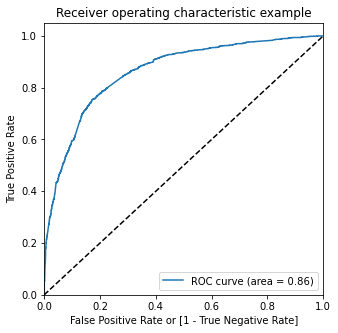

In [136]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The ROC curve looks good.

### Step 12: Finding Optimal Cutoff Point

In [137]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.625299,6629,1,1,1,1,1,1,1,1,0,0,0
1,0,0.167454,325,0,1,1,0,0,0,0,0,0,0,0
2,1,0.307806,3945,0,1,1,1,1,0,0,0,0,0,0
3,1,0.917803,5292,1,1,1,1,1,1,1,1,1,1,1
4,1,0.773752,8642,1,1,1,1,1,1,1,1,1,0,0


In [138]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.490980  1.000000  0.000000
0.1   0.1  0.559032  0.989767  0.143562
0.2   0.2  0.696506  0.945116  0.456707
0.3   0.3  0.753140  0.911163  0.600718
0.4   0.4  0.779173  0.842326  0.718259
0.5   0.5  0.789450  0.746512  0.830866
0.6   0.6  0.777118  0.682326  0.868551
0.7   0.7  0.736698  0.551163  0.915657
0.8   0.8  0.703357  0.447442  0.950202
0.9   0.9  0.642612  0.291628  0.981157


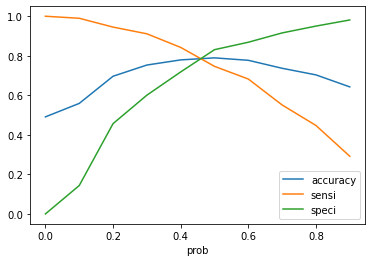

In [139]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.45 seems like the optimum point. 
#### Rounding off and considering 0.5 as cutoff probability since the results are as per business expectations on test and train data.

In [140]:
cutoff_new=0.5

In [141]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > cutoff_new else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.625299,6629,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.167454,325,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.307806,3945,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.917803,5292,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.773752,8642,1,1,1,1,1,1,1,1,1,0,0,1


In [142]:
# Let's check the overall accuracy.
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
accuracy

0.7894496460379082

In [143]:
# Let's take a look at the confusion matrix again 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1852,  377],
       [ 545, 1605]], dtype=int64)

In [144]:
# Actual/Predicted     not_converted    converted
  # not_converted        1852            377
  # converted            545            1605  

In [145]:
TP1 = confusion2[1,1] # true positive 
TN1 = confusion2[0,0] # true negatives
FP1 = confusion2[0,1] # false positives
FN1 = confusion2[1,0] # false negatives

In [146]:
# The sensitivity of the final logistic regression model
# Sensitivity = Number of actual Yeses correctly predicted by the model/Total number of actual Yeses 
# i.e. Total number of conversions correctly predicted
sensitivity = TP1 / float(TP1+FN1)
sensitivity

0.7465116279069768

In [147]:
# The specificity of the final logistic regression model
# Specificity = Number of actual No's correctly predicted by the model/Total number of actual No's
# i.e. Total number of non-conversions correctly predicted
specificity = TN1 / float(TN1+FP1)
specificity

0.8308658591296546

In [148]:
from sklearn.metrics import precision_score, recall_score
# The precision of the final logistic regression model
# Probability that a predicted Yes is actually a Yes - TP/(TP+FP)
precision = precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
precision

0.8097880928355197

In [149]:
# The recall of the final logistic regression model
# Probability that an actual Yes is predicted correctly
recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
recall

0.7465116279069768

#### Precision and recall tradeoff

In [150]:
from sklearn.metrics import precision_recall_curve

In [151]:
# y_train_pred_final.Converted, y_train_pred_final.predicted

In [152]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

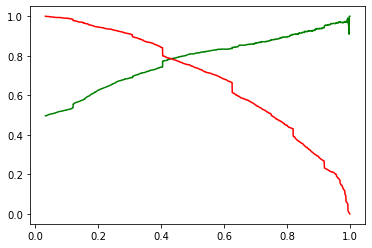

In [153]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 13: Making predictions on the test set

In [154]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [155]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unreachable
1751,-0.937050,0,1,0,0,0,0,0,1,0,0,0
8342,0.734302,0,0,0,0,0,0,0,1,0,0,0
4608,-0.495098,0,0,0,0,0,0,0,1,0,0,0
4723,-0.937050,0,0,0,1,0,0,0,0,0,0,0
8202,0.483511,1,0,0,0,0,0,0,0,0,0,0


In [156]:
X_test_sm = sm.add_constant(X_test)

In [157]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1

,0
1751,0.404166
8342,0.511267
4608,0.223328
4723,0.953075
8202,0.270506
...,...
8545,0.487621
7636,0.980061
163,0.678440
3514,0.625299


In [158]:
y_test_df = pd.DataFrame(y_test)
y_test_df['LeadID'] = y_test_df.index

In [159]:
y_test_df.head()

,Converted,LeadID
1751,0,1751
8342,0,8342
4608,1,4608
4723,1,4723
8202,0,8202


In [160]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [161]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [162]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [163]:
y_pred_final.head()

,Converted,LeadID,0
0,0,1751,0.404166
1,0,8342,0.511267
2,1,4608,0.223328
3,1,4723,0.953075
4,0,8202,0.270506


In [164]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [165]:
y_pred_final

,Converted,LeadID,Conversion_Prob
0,0,1751,0.404166
1,0,8342,0.511267
2,1,4608,0.223328
3,1,4723,0.953075
4,0,8202,0.270506
...,...,...,...
1873,0,8545,0.487621
1874,1,7636,0.980061
1875,1,163,0.678440
1876,1,3514,0.625299


In [166]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_Prob'], axis=1)

In [167]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,1751,0,0.404166
1,8342,0,0.511267
2,4608,1,0.223328
3,4723,1,0.953075
4,8202,0,0.270506


In [168]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > cutoff_new else 0)

In [169]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,1751,0,0.404166,0
1,8342,0,0.511267,1
2,4608,1,0.223328,0
3,4723,1,0.953075,1
4,8202,0,0.270506,0


#### Assigning Lead Score & Hot Leads

In [170]:
# Adding Lead_Score column to y_pred_final
y_pred_final['Lead_Score'] = round((y_pred_final['Conversion_Prob'] * 100),0)
y_pred_final['Lead_Score'] = y_pred_final['Lead_Score'].astype(int)

In [183]:
y_pred_final['Potential'] = y_pred_final.Lead_Score.map(lambda x: "Hot Lead" if x > 50 else "Cold Lead")

In [184]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted,Lead_Score,Potential
0,1751,0,0.404166,0,40,Cold Lead
1,8342,0,0.511267,1,51,Hot Lead
2,4608,1,0.223328,0,22,Cold Lead
3,4723,1,0.953075,1,95,Hot Lead
4,8202,0,0.270506,0,27,Cold Lead


In [173]:
# Let's check the overall accuracy.
accuracy_test = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
accuracy_test

0.7870074547390842

In [174]:
# Let's take a look at the confusion matrix again 
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[834, 154],
       [246, 644]], dtype=int64)

In [175]:
# Actual/Predicted     not_converted    converted
  # not_converted        1852            377
  # converted            545            1605  

In [176]:
TP1 = confusion2[1,1] # true positive 
TN1 = confusion2[0,0] # true negatives
FP1 = confusion2[0,1] # false positives
FN1 = confusion2[1,0] # false negatives

In [177]:
# The sensitivity of the final logistic regression model
# Sensitivity = Number of actual Yeses correctly predicted by the model/Total number of actual Yeses 
# i.e. Total number of conversions correctly predicted
sensitivity_test = TP1 / float(TP1+FN1)
sensitivity_test

0.7235955056179775

In [178]:
# The specificity of the final logistic regression model
# Specificity = Number of actual No's correctly predicted by the model/Total number of actual No's
# i.e. Total number of non-conversions correctly predicted
specificity_test = TN1 / float(TN1+FP1)
specificity_test

0.8441295546558705

In [179]:
from sklearn.metrics import precision_score, recall_score
# The precision of the final logistic regression model
# Probability that a predicted Yes is actually a Yes - TP/(TP+FP)
precision_test = precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
precision_test

0.8097880928355197

In [180]:
# The recall of the final logistic regression model
recall_test = recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
recall_test

0.7465116279069768

In [181]:
print(f"Accuracy of train data - {round(accuracy*100,2)}")
print(f"Sensitivity of train data - {round(sensitivity*100,2)}")
print(f"Specificity of train data - {round(specificity*100,2)}")
print(f"Precision of train data - {round(precision*100,2)}")
print(f"Recall of train data - {round(recall*100,2)}")

Accuracy of train data - 78.94
Sensitivity of train data - 74.65
Specificity of train data - 83.09
Precision of train data - 80.98
Recall of train data - 74.65


In [182]:
print(f"Accuracy of test data - {round(accuracy_test*100,2)}")
print(f"Sensitivity of test data - {round(sensitivity_test*100,2)}")
print(f"Specificity of test data - {round(specificity_test*100,2)}")
print(f"Precision of test data - {round(precision_test*100,2)}")
print(f"Recall of test data - {round(recall_test*100,2)}")

Accuracy of test data - 78.7
Sensitivity of test data - 72.36
Specificity of test data - 84.41
Precision of test data - 80.98
Recall of test data - 74.65


#### The model looks great on the train & test data and can be used for further predictions.
The final features involved in the model are: 
    
Lead Source_Olark Chat

Lead Source_Direct Traffic

Last Activity_Email Opened

Last Activity_SMS Sent

Lead Source_Reference

Total Time Spent on Website

What is your current occupation_Working Professional

Last Activity_Olark Chat Conversation

Lead Source_Welingak Website

Last Activity_Converted to Lead

Last Activity_Email Bounced

Last Activity_Unreachable